<a href="https://colab.research.google.com/github/JordanMusera/deep_learning/blob/main/load_data_and_train_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [73]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [74]:
#pick a manual seed for randomisation
torch.manual_seed(41)
#create an instance of the model
model = Model()

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [77]:
#replace string with integer
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

/tmp/ipython-input-254535644.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [78]:
#Train Test Split Set X,y
X = my_df.drop('species',axis=1)
y = my_df['species']

#Convert this to numpy arrays
X = X.values
y = y.values

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [80]:
#Set the criterion of the model to measure the error
criterion = nn.CrossEntropyLoss()
#Set Adam optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [81]:
#Train our model
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())

  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.1095242500305176
Epoch: 20 and loss: 1.0960756540298462
Epoch: 30 and loss: 1.0845398902893066
Epoch: 40 and loss: 1.073915719985962
Epoch: 50 and loss: 1.0637413263320923
Epoch: 60 and loss: 1.0538722276687622
Epoch: 70 and loss: 1.0440350770950317
Epoch: 80 and loss: 1.0337213277816772
Epoch: 90 and loss: 1.0227365493774414


Text(0.5, 0, 'Epoch')

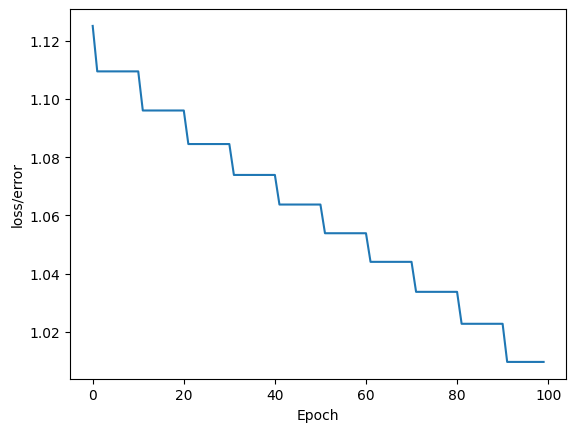

In [82]:
plt.plot(range(epochs), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')